In [61]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [62]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

In [63]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)

In [64]:
class GetWeights(tf.keras.callbacks.Callback):
    # Keras callback which collects values of weights and biases at each epoch
    def __init__(self):
        super(GetWeights, self).__init__()
        self.weight_dict = {}

    def on_epoch_end(self, epoch, logs=None):
        # this function runs at the end of each epoch

        # loop over each layer and get weights and biases
        for layer_i in range(len(self.model.layers)):
            w = self.model.layers[layer_i].get_weights()[0]
            b = self.model.layers[layer_i].get_weights()[1]
            print('Layer %s has weights of shape %s and biases of shape %s' %(
                layer_i, np.shape(w), np.shape(b)))
            print('солой %s коф. %s and смещение %s' %(
                layer_i, w, b))

            # save all weights and biases inside a dictionary
            if epoch == 0:
                # create array to hold weights and biases
                self.weight_dict['w_'+str(layer_i+1)] = w
                self.weight_dict['b_'+str(layer_i+1)] = b
            else:
                # append new weights to previously-created weights array
                self.weight_dict['w_'+str(layer_i+1)] = np.dstack(
                    (self.weight_dict['w_'+str(layer_i+1)], w))
                # append new weights to previously-created weights array
                self.weight_dict['b_'+str(layer_i+1)] = np.dstack(
                    (self.weight_dict['b_'+str(layer_i+1)], b))

In [65]:
gw = GetWeights()

In [66]:
model.fit(xs, ys, epochs=5, callbacks=[gw])

Epoch 1/5
1/1 [==============================] - ETA: 0s - loss: 115.5521Layer 0 has weights of shape (1, 1) and biases of shape (1,)
солой 0 коф. [[-0.9397839]] and смещение [0.15281805]
1/1 [==============================] - 1s 501ms/step - loss: 115.5521
Epoch 2/5
1/1 [==============================] - ETA: 0s - loss: 90.9273Layer 0 has weights of shape (1, 1) and biases of shape (1,)
солой 0 коф. [[-0.5072574]] and смещение [0.28795522]
1/1 [==============================] - 0s 10ms/step - loss: 90.9273
Epoch 3/5
1/1 [==============================] - ETA: 0s - loss: 71.5534Layer 0 has weights of shape (1, 1) and biases of shape (1,)
солой 0 коф. [[-0.12347946]] and смещение [0.40741384]
1/1 [==============================] - 0s 12ms/step - loss: 71.5534
Epoch 4/5
1/1 [==============================] - ETA: 0s - loss: 56.3106Layer 0 has weights of shape (1, 1) and biases of shape (1,)
солой 0 коф. [[0.21705768]] and смещение [0.51297]
1/1 [==============================] - 0s 10ms/

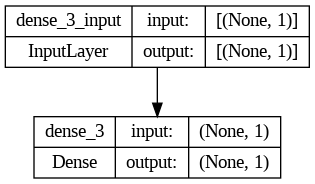

In [67]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [68]:
print(model.layers[0].get_weights())
for key in gw.weight_dict:
    print(str(key) + ' shape: %s' %str(np.shape(gw.weight_dict[key])))


[array([[0.5192393]], dtype=float32), array([0.60619885], dtype=float32)]
w_1 shape: (1, 1, 5)
b_1 shape: (1, 1, 5)


In [70]:
print(model.predict([0.1]))

1/1 [==============================] - 0s 65ms/step
[[0.6581228]]
